In [29]:
import subprocess  


get_sift_m='/media/Trajectory3D/scripts/matches_lines/draw_inliner.m'
matlab_command = ["/usr/local/Matlab/R2020a/bin//matlab", "-nodisplay", "-nosplash", "-r", "run('{}'); exit".format(get_sift_m)]

# 使用 subprocess.Popen
process = subprocess.Popen(matlab_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

[4.8013757e+02 1.3481482e+03 1.1510687e+00 0.0000000e+00]
[   6 8031]
(17040, 4)
(10464, 4)
(5135, 2)
[   6 8031]


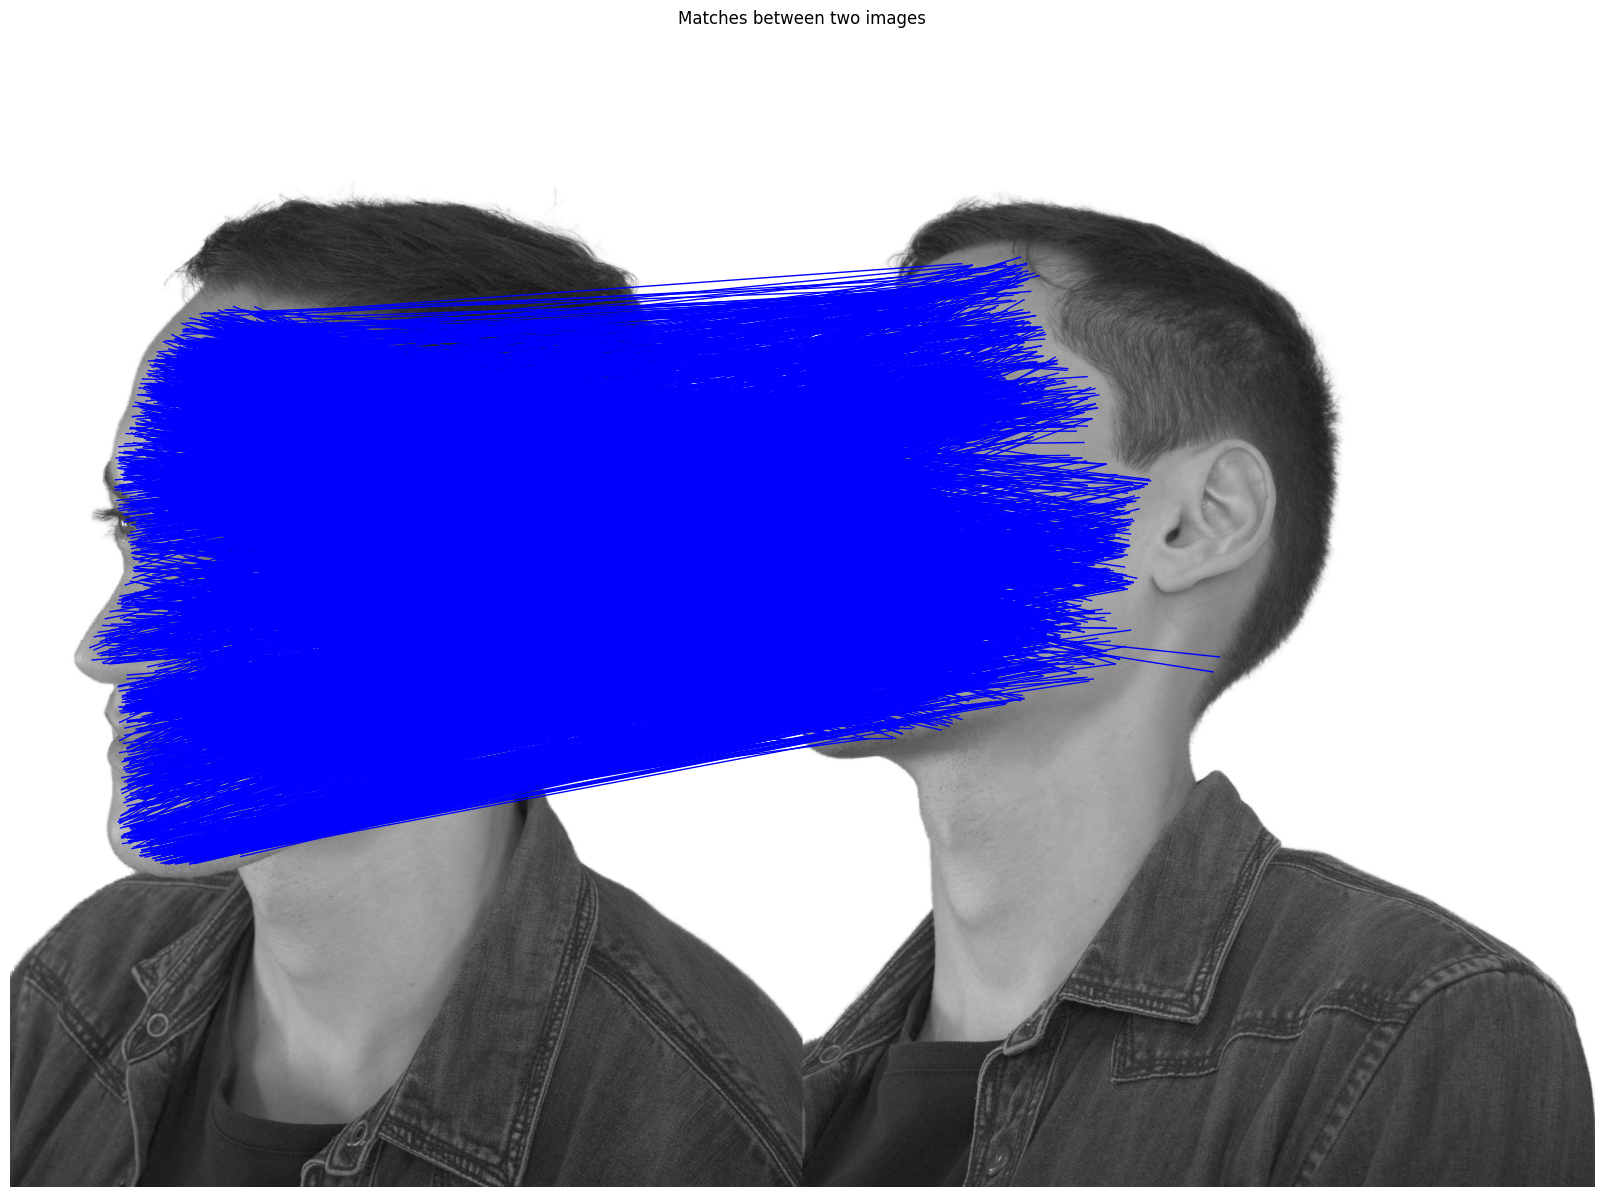

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import struct

def read_keypoints(path):
    """
    READ_KEYPOINTS - Read the keypoints from a binary file.

    Args:
        path: Path to the keypoint file.

    Returns:
        keypoints: The keypoints read from the file.
    """
    with open(path, 'rb') as fid:
        shape = np.fromfile(fid, dtype=np.int32, count=2)
        keypoints = np.fromfile(fid, dtype=np.float32, count=shape[0] * shape[1])
        keypoints = keypoints.reshape((shape[0], shape[1]))  # Transpose to match MATLAB's behavior

    

    return keypoints


def read_matches(path):
    """
    READ_MATCHES - Read the matches from a binary file.
    :param path: Path to match file.
    :return matches: Integer match indices, where each row represents one
                     match pair between two images.
    """
    # 打开文件
    with open(path, 'rb') as fid:
        # 读取文件头（匹配矩阵的维度）
        dims = struct.unpack('2i', fid.read(8))  # 读取两个 int32 类型的值
        num_matches, num_cols = dims

        # 读取匹配数据
        # 每个匹配项是 uint32 类型，占用 4 字节
        match_data = fid.read(num_matches * num_cols * 4)
        matches = np.frombuffer(match_data, dtype=np.uint32).reshape(num_matches, num_cols)

        # # 从 0-based 索引转换为 1-based 索引
        # matches = matches + 1

        # 检查读取结果
        assert matches.shape[1] == 2, '匹配矩阵的列数应为 2'

    return matches

def draw_matches_inliers(img1, img2, keypoints1, keypoints2, matches):
    """
    绘制关键点匹配连线（基础版本，无交互）。
    """

    # 检查并转换灰度图像 (如果需要)
    if len(img1.shape) == 3:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    if len(img2.shape) == 3:
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # 拼接图像
    img1_height, img1_width = img1.shape[:2]
    img2_height, img2_width = img2.shape[:2]
    img_combined = np.hstack((img1, img2))
    if len(img_combined.shape) == 2:  # 如果图像是灰度图
        img_combined = cv2.cvtColor(img_combined, cv2.COLOR_GRAY2BGR)  # 灰度转RGB,不然灰度图无法连线

    # 绘制拼接后的图像
    plt.figure(figsize=(30, 15))
    plt.imshow(img_combined)

    # 提取匹配点坐标, 并进行索引调整
    # matches = matches.astype(np.int32)
    matched_points1 = keypoints1[matches[:, 0], :]
    matched_points2 = keypoints2[matches[:, 1], :]

    # 调整第二张图片的匹配点坐标
    matched_points2[:, 0] += img1_width

    # 绘制匹配点之间的连线
    for i in range(matches.shape[0]):
        plt.plot([matched_points1[i, 0], matched_points2[i, 0]],
                 [matched_points1[i, 1], matched_points2[i, 1]],
                 'b-', linewidth=1)  # 蓝色线条

    plt.title('Matches between two images')
    plt.axis('off')
    plt.show()


# --- 读取数据 ---
img1_path = '/media/Trajectory3D/temp/images/1.png'
img2_path = '/media/Trajectory3D/temp/images/2.png'
key1_path = '/media/Trajectory3D/temp/keypoints/1.png.bin'
key2_path = '/media/Trajectory3D/temp/keypoints/2.png.bin'
matches_path = '/media/Trajectory3D/temp/matches/1.png---2.png.bin'

# img1_path = '/media/DGST_data/Test_Data/076/EMO-1-shout+laugh/3/psiftproject/images/1.png'
# img2_path = '/media/DGST_data/Test_Data/076/EMO-1-shout+laugh/3/psiftproject/images/2.png'
# key1_path = '/media/DGST_data/Test_Data/076/EMO-1-shout+laugh/3/psiftproject/keypoints/1.png.bin'
# key2_path = '/media/DGST_data/Test_Data/076/EMO-1-shout+laugh/3/psiftproject/keypoints/2.png.bin'
# matches_path = '/media/DGST_data/Test_Data/076/EMO-1-shout+laugh/3/psiftproject/matches/1.png---2.png.bin'

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
key1 = read_keypoints(key1_path)
key2 = read_keypoints(key2_path)
matches = read_matches(matches_path)
print(key1[0])
print(matches[0])
print(key1.shape)
print(key2.shape)
print(matches.shape)
print(matches[0])
# --- 处理 matches ---
# start = 0
# showpointnumber = len(matches) - 1
# matches = matches[start : start + showpointnumber] # 这步是多余的

# print(17040 in matches[:, 0])
# matches = matches[100:150]

# --- 绘制匹配 ---
draw_matches_inliers(img1, img2, key1, key2, matches)